In [4]:
# This line is a convenience to import most packages you'll need. You may need to import others (e.g. random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math, csv
from IPython.display import Audio
from sklearn.datasets import load_iris
# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

In [2]:
def feature_extraction(file_path):
    '''
    Takes an audio file path, read the audio (keep the original sampling rate), 
    extract audio features from the audio, and outputs a single feature vector containing
    [mean-zero-crossing-rate, mean-delta-zero-crossing-rate, mean-spectral-centroid, mean-delta-spectral-centroid]
    
    Input Parameters
    ----------------
    file_path: a string indicating a path to an audio file.
    
    Returns
    ----------------
    feature_vector: a 1-D numpy array of an extracted feature vector.
    '''
    # read in the signal
    audio_signal, sr = librosa.load(file_path, sr=None)
    
    # compute zero crossings
    zero_crossings = librosa.feature.zero_crossing_rate(audio_signal, frame_length=2048, hop_length=1024)
    
    # compute spectral centroid should I be worried about the sampling rate?
    spectral_centroid = librosa.feature.spectral_centroid(audio_signal, hop_length=1024, sr=sr) 
    
    
    # pack the feacture vector, does delta mean mean the average of the derivative?
    # maybe use the librosa delta?
    feature_vector = np.array([np.mean(zero_crossings), np.mean(librosa.feature.delta(zero_crossings)),
                              np.mean(spectral_centroid), np.mean(librosa.feature.delta(spectral_centroid))])
    
    # print("feature_vector shape", feature_vector.shape)
    
    return feature_vector

In [6]:
AM_signal, sr = librosa.load("wav_files/AM.wav", sr=44100)

In [10]:
Audio(AM_signal, rate=sr)

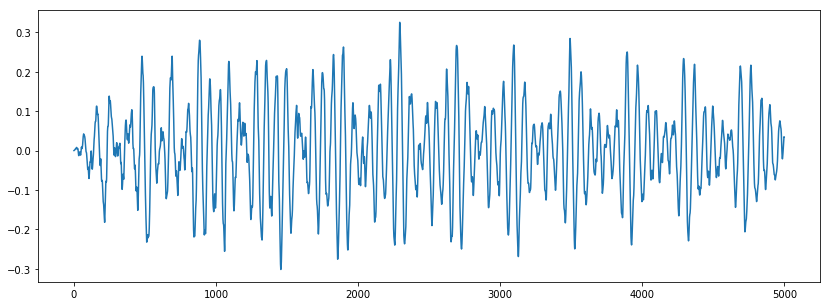

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(AM_signal[:5000])

In [16]:
aminor_signal, sr = librosa.load("wav_files/aminor.wav", sr=44100)

In [17]:
Audio(aminor_signal, rate=sr)

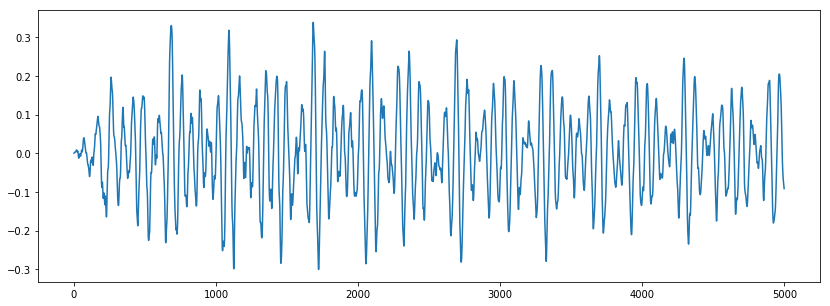

In [48]:
plt.figure(figsize=(14, 5))
plt.plot(aminor_signal[:5000])

In [61]:
CM_electric_guitar, sr = librosa.load("wav_files/CM_electric_guitar.wav", sr=44100)

In [62]:
Audio(CM_electric_guitar, rate=sr)

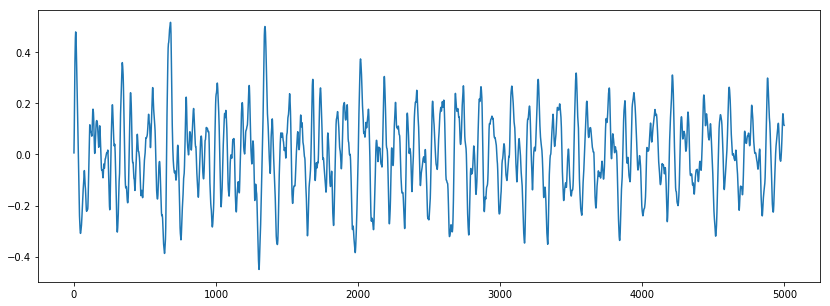

In [64]:
plt.figure(figsize=(14, 5))
plt.plot(CM_electric_guitar[:5000])

In [4]:
cminor_electric_guitar, sr = librosa.load("wav_files/cminor_electric_guitar.wav", sr=44100)

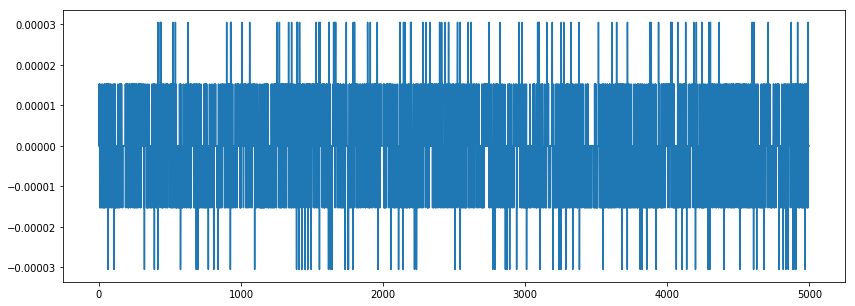

In [60]:
plt.figure(figsize=(14, 5))
plt.plot(cminor_electric_guitar[:5000])

In [22]:
import librosa.display

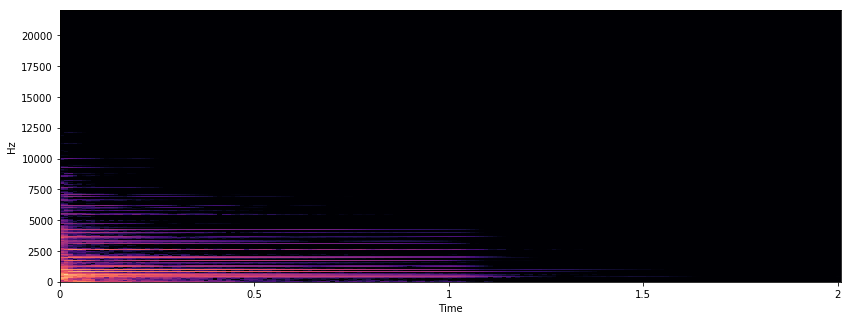

In [30]:
am_X = librosa.stft(aminor_signal)
am_Xdb = librosa.amplitude_to_db(abs(am_X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(am_Xdb, sr=sr, x_axis='time', y_axis='hz')

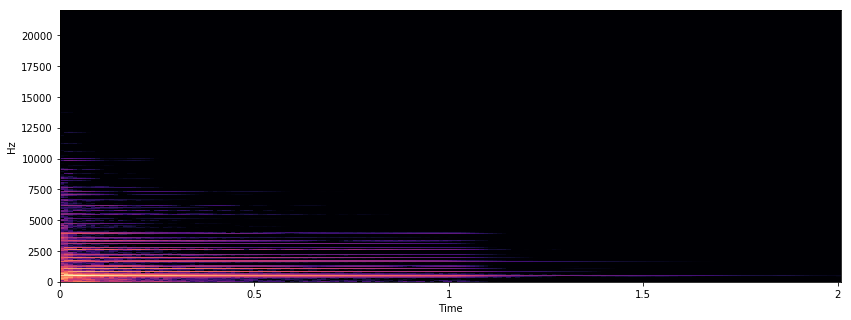

In [29]:
A_X = librosa.stft(AM_signal)
A_Xdb = librosa.amplitude_to_db(abs(A_X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(A_Xdb, sr=sr, x_axis='time', y_axis='hz')

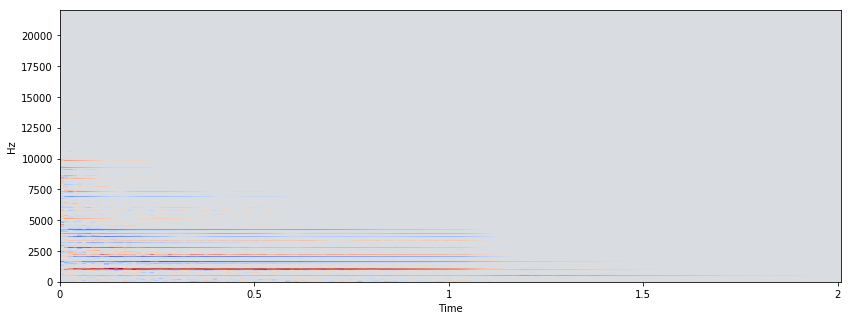

In [32]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(A_Xdb - am_Xdb, sr=sr, x_axis='time', y_axis='hz')


In [49]:
def template_prep():
    major_chords = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    minor_chords = ['am', 'bm', 'cm', 'dm', 'em', 'fm', 'gm']

    template_chords = {}

    for chord in major_chords:
        audio, sr = librosa.load("wav_files/" + chord + "M.wav", sr=None)
        template_chords[chord] = np.mean(librosa.feature.chroma_stft(audio[:5000], sr=sr), axis=1)

    for chord in minor_chords:
        audio, sr = librosa.load("wav_files/" + chord + "inor.wav", sr=None)
        template_chords[chord] = np.mean(librosa.feature.chroma_stft(audio[:5000], sr=sr), axis=1)

    return template_chords



In [50]:
def classify(new_sample_path, template_chords):

    audio, sr = librosa.load(new_sample_path, sr=None)
    new_chroma = np.mean(librosa.feature.chroma_stft(audio[:5000], sr=sr), axis=1)

    max_sim = 0.0
    max_class = "default"

    for chord, chroma in template_chords.items():
        s = np.abs(np.inner(new_chroma, chroma) / (np.linalg.norm(new_chroma) * np.linalg.norm(chroma)))
        if s > max_sim:
            max_sim = s
            max_class = chord

    return max_class

In [65]:
tc = template_prep()

print(classify('wav_files/AM.wav', tc))
print(classify('wav_files/dminor.wav', tc))
print(classify('wav_files/cminor_electric_guitar.wav', tc))
print(classify('wav_files/CM_electric_guitar.wav', tc))
print(classify('wav_files/DM_electric_guitar.wav', tc))
print(classify('wav_files/EM_electric_guitar.wav', tc))

A
dm
cm
C
D
E


In [66]:
def template_prep():
    chords = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    template_chords = {}

    for chord in chords:
        audio, sr = librosa.load("wav_files/" + chord + ".wav", sr=None)
        # print(np.shape(librosa.feature.chroma_stft(audio, sr=sr)))
        template_chords[chord] = np.mean(librosa.feature.chroma_stft(audio, sr=sr), axis=1)

    for chord in chords:
        audio, sr = librosa.load("wav_files/" + chord + "M.wav", sr=None)
        # print(np.shape(librosa.feature.chroma_stft(audio, sr=sr)))
        template_chords[chord + 'm'] = np.mean(librosa.feature.chroma_stft(audio, sr=sr), axis=1)

    return template_chords


def template_prep2():
    chords = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    template_chords = {}

    for chord in chords:
        audio, sr = librosa.load("wav_files/" + chord + ".wav", sr=None)
        # print(np.shape(librosa.feature.chroma_stft(audio, sr=sr)))
        template_chords[chord] = librosa.feature.chroma_stft(audio, sr=sr)

    for chord in chords:
        audio, sr = librosa.load("wav_files/" + chord + "M.wav", sr=None)
        # print(np.shape(librosa.feature.chroma_stft(audio, sr=sr)))
        template_chords[chord + 'm'] = librosa.feature.chroma_stft(audio, sr=sr)

    return template_chords


def classify(new_sample_path, template_chords):

    audio, sr = librosa.load(new_sample_path, sr=None)
    new_chroma = np.mean(librosa.feature.chroma_stft(audio, sr=sr), axis=1)

    max_sim = 0.0
    max_class = "default"

    for chord, chroma in template_chords.items():
        s = np.abs(np.inner(new_chroma, chroma) / (np.linalg.norm(new_chroma) * np.linalg.norm(chroma)))
        if s > max_sim:
            max_sim = s
            max_class = chord

    return max_class


def classify2(new_sample_path, template_chords):

    audio, sr = librosa.load(new_sample_path, sr=None)
    new_chroma = librosa.feature.chroma_stft(audio, sr=sr)

    max_classes = ["default"] * np.shape(new_chroma)[1]

    for t in range(np.shape(new_chroma)[1]):
        max_sim = 0.0

        for chord, chroma in template_chords.items():
            s = np.abs(np.inner(new_chroma[:,t], chroma[:,t]) / (np.linalg.norm(new_chroma[:,t]) * np.linalg.norm(chroma[:,t])))
            if s > max_sim:
                max_sim = s
                max_classes[t] = chord

    return max_classes


In [67]:
tc = template_prep()
tc2 = template_prep2()

print(classify('wav_files/A.wav', tc) + '   expected: A')
print(classify('wav_files/DM.wav', tc) + '   expected: Dm')
print(classify('wav_files/C_electric_guitar.wav', tc) + '   expected: C')
print(classify('wav_files/D_electric_guitar.wav', tc) + '   expected: D')
print(classify('wav_files/E_electric_guitar.wav', tc) + '   expected: E')

print(classify('wav_files/G_synth_37th_street.wav', tc) + '   expected: G')
print(classify('wav_files/A_synth_37th_street.wav', tc) + '   expected: A')
print(classify('wav_files/B_synth_37th_street.wav', tc) + '   expected: B')

print(classify2('wav_files/AM.wav', tc2))
print('expected: Am')
print(classify2('wav_files/D_electric_guitar.wav', tc2))
print('expected: D')
print(classify2('wav_files/E_electric_guitar.wav', tc2))
print('expected: E')
print(classify2('wav_files/G_synth_37th_street.wav', tc2))
print('expected: G')
print(classify2('wav_files/A_synth_37th_street.wav', tc2))
print('expected: A')

A   expected: A
Dm   expected: Dm
C   expected: C
D   expected: D
E   expected: E
Dm   expected: G
E   expected: A
D   expected: B
['Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am', 'Am'

In [6]:
import librosa.display

Text(0.5, 1.0, 'Power spectrogram')

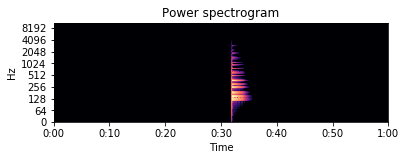

In [7]:
D = np.abs(librosa.stft(cminor_electric_guitar))
times = librosa.frames_to_time(np.arange(D.shape[1]))
plt.figure()
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram')

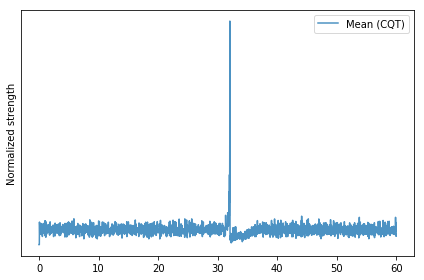

In [8]:
onset_env = librosa.onset.onset_strength(y=cminor_electric_guitar, sr=sr, feature=librosa.cqt)
plt.plot(times, onset_env / onset_env.max(), alpha=0.8, label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

In [1]:
from __future__ import division
from chromagram import compute_chroma
import os
from scipy.io.wavfile import read
import numpy as np 



"""calculates multivariate gaussian matrix from mean and covariance matrices"""
def multivariate_gaussian(x, meu, cov):
    det = np.linalg.det(cov)
    val = np.exp(-0.5 * np.dot(np.dot((x-meu).T, np.linalg.inv(cov)), (x-meu)))
    try:
        val /= np.sqrt(((2*np.pi)**12)*det)
    except:
        print('Matrix is not positive, semi-definite')
    if np.isnan(val):
        val = np.finfo(float).eps
    return val


In [2]:
"""initialize the emission, transition and initialisation matrices for HMM in chord recognition
PI - initialisation matrix, #A - transition matrix, #B - observation matrix"""
def initialize(chroma, templates, nested_cof):

    """initialising PI with equal probabilities"""
    PI = np.ones(24)/24

    """initialising A based on nested circle of fifths"""
    eps = 0.01
    A = np.empty((24,24))
    for chord in chords:
        ind = nested_cof.index(chord)
        t = ind
        for i in range(24):
            if t >= 24:
                t = t%24
            A[ind][t] = (abs(12-i)+eps)/(144 + 24*eps)
            t += 1

    
    """initialising based on tonic triads - Mean matrix; Tonic with dominant - 0.8,
    tonic with mediant 0.6 and mediant-dominant 0.8, non-triad diagonal	elements 
    with 0.2 - covariance matrix"""

    nFrames = np.shape(chroma)[1]
    B = np.zeros((24,nFrames))
    meu_mat = np.zeros((24,12))
    cov_mat = np.zeros((24,12,12))
    meu_mat = np.array(templates)
    offset = 0

    for i in range(24):
        if i == 12:
            offset = 0
        tonic = offset
        if i<12:
            mediant = (tonic + 4)%12
        else:
            mediant = (tonic + 3)%12
        dominant = (tonic+7)%12

        #weighted diagonal
        cov_mat[i,tonic,tonic] = 0.8
        cov_mat[i,mediant,mediant] = 0.6
        cov_mat[i,dominant,dominant] = 0.8


        #filling non zero diagonals
        for j in range(12):
            if cov_mat[i,j,j] == 0:
                cov_mat[i,j,j] = 0.2
        offset += 1


    """observation matrix B is a multivariate Gaussian calculated from mean vector and 
    covariance matrix"""

    for m in range(nFrames):
        for n in range(24):
            B[n,m] = multivariate_gaussian(chroma[:,m], meu_mat[n,:],cov_mat[n,:,:])

    return (PI,A,B)

In [3]:
def viterbi(PI,A,B):
    (nrow, ncol) = np.shape(B)
    path = np.zeros((nrow, ncol))
    states = np.zeros((nrow,ncol))
    path[:,0] = PI * B[:,0]

    for i in range(1,ncol):
        for j in range(nrow):
            s = [(path[k,i-1] * A[k,j] * B[j,i], k) for k in range(nrow)]
            (prob,state) = max(s)
            path[j,i] = prob
            states[j,i-1] = state
    
    return (path,states)


In [7]:
import json
"""read from JSON file to get chord templates"""

with open('chord_templates.json', 'r') as fp:
    templates_json = json.load(fp)

chords = ['G','G#','A','A#','B','C','C#','D','D#','E','F','F#','Gm','G#m','Am','A#m','Bm','Cm','C#m','Dm','D#m','Em','Fm','F#m']
nested_cof = ['G','Bm','D','F#m','A','C#m','E','G#m','B','D#m','F#','A#m','C#',"Fm","G#",'Cm','D#','Gm','A#','Dm','F','Am','C','Em']
templates = []

for chord in chords:
    templates.append(templates_json[chord])

In [8]:
templates

[[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]]

In [ ]:
"""read audio and compute chromagram"""
import os
directory = os.getcwd() + '/wav_files/'
fname = "chords_piano_equal.wav"
signal, sr = librosa.load(directory + fname)

In [15]:
onset_frames = librosa.onset.onset_detect(y=signal, sr=sr)

In [16]:
onset_frames

array([  87,  173,  259,  345,  432,  518,  604,  690,  776,  862,  948,
       1035, 1121, 1207, 1293], dtype=int64)

In [24]:
number_of_frames = onset_frames.shape[0] + 1
print(number_of_frames)

x_frames = []
chroma = np.empty((12, number_of_frames))

index = 0
n = 0
for new_index in list(onset_frames):

    chroma[:, n] = np.mean(librosa.feature.chroma_stft(signal[index:new_index], sr = fs), axis=1)

    if  np.all(chroma[:,n] == 0):
        chroma[:,n] = np.finfo(float).eps
    else:
        chroma[:,n] /= np.max(np.absolute(chroma[:,n]))
        
    n += 1
    index = new_index

chroma[:, n] = np.mean(librosa.feature.chroma_stft(signal[index:], sr = fs), axis=1)

times = librosa.frames_to_time(onset_frames, sr=sr)

16


In [29]:


#get max probability path from Viterbi algorithm
(PI,A,B) = initialize(chroma, templates, nested_cof)
(path, states) = viterbi(PI,A,B)

#normalize path
for i in range(number_of_frames):
    path[:,i] /= sum(path[:,i])

#choose most likely chord - with max value in 'path'
final_chords = []
indices = np.argmax(path,axis=0)
final_states = np.zeros(nFrames)


#find no chord zone
set_zero = np.where(np.max(path,axis=0) < 0.3*np.max(path))[0]
if np.size(set_zero) is not 0:
    indices[set_zero] = -1

#identify chords
for i in range(number_of_frames):
    if indices[i] == -1:
        final_chords.append('NC')
    else:
        final_states[i] = states[indices[i],i]
        final_chords.append(chords[int(final_states[i])])

print('Time(s)','Chords')
for i in range(number_of_frames):
    print(timestamp[i], final_chords[i])

Time(s) Chords
0.0 NC
0.0 Gm
0.0 NC
0.0 G
0.0 NC
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 G
0.0 NC
